### Make temperature and salinity binary files from given profiles

Make a binary file with horizontally homogeneous initial T and S conditions.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.interpolate as sci_interp

In [3]:
# Profiles from SVB Feb run
T_SVB = np.array([16.58,16.57,16.56,16.55,16.54,16.54,16.53,16.52,16.51,16.50,16.49,
              16.47,16.45,16.42,16.38,16.33,16.23,16.13,15.99,15.86,15.69,15.52,
              15.31,15.08,14.80,14.52,14.20,13.86,13.47,13.04,12.58,12.13,11.68,
              11.27,10.91,10.57,10.25,9.94,9.64,9.43,9.23,9.03,8.82,8.63,8.44,8.26,
              8.06,7.84,7.62,7.38,7.14,6.91,6.72,6.54,6.36,6.19,6.04,5.91,5.78,5.65,
              5.53,5.40,5.27,5.13,5.00,4.85,4.70,4.56,4.41,4.27,4.13,3.99,3.84,3.68,
              3.51,3.33,3.16,2.98,2.80,2.65,2.49,2.34,2.20,2.09,2.03,1.99,1.94,1.89,
              1.85,1.80,1.75,1.70,1.65,1.61,1.56,1.51,1.46,1.40,1.41,1.42])
S_SVB = np.array([33.63,33.63,33.63,33.63,33.63,33.63,33.63,33.63,33.63,33.63,33.63,
              33.63,33.63,33.63,33.63,33.63,33.63,33.63,33.64,33.64,33.64,33.65,
              33.65,33.66,33.66,33.67,33.69,33.70,33.72,33.75,33.77,33.78,33.80,
              33.82,33.84,33.86,33.88,33.91,33.94,33.96,33.99,34.01,34.04,34.07,
              34.09,34.12,34.15,34.16,34.17,34.18,34.19,34.20,34.23,34.25,34.27,
              34.29,34.31,34.32,34.34,34.35,34.36,34.37,34.38,34.39,34.40,34.41,
              34.42,34.44,34.45,34.47,34.48,34.49,34.51,34.52,34.54,34.55,34.56,
              34.57,34.58,34.59,34.60,34.61,34.62,34.63,34.64,34.65,34.66,34.67,
              34.68,34.68,34.68,34.68,34.68,34.68,34.68,34.69,34.69,34.69,34.69,
              34.71])
delR_SVB = np.array([2, 2, 2, 2, 2, 2.2, 2.4, 2.6, 2.8, 3.0, 3.2, 3.5, 3.8, 4.2, 4.5,
                 4.8, 5, 5, 5, 5, 5, 5, 5.5, 5.5, 5.5, 5.5, 5.5, 6, 6.5,7, 7.5, 
                 8, 8.5, 9.2, 10, 10, 10, 10, 10, 10, 10, 11, 12, 13, 14, 15, 16, 
                 17, 18, 20,22, 23, 25, 25, 25, 25, 25, 25, 25, 25, 27, 28, 30, 
                 30, 32, 34, 36, 38, 40, 43, 46, 50, 55, 59, 65, 70, 75, 80, 85, 
                 92, 100, 100, 100, 100, 100, 100, 105, 115, 125, 132,145, 160, 
                 170, 180, 190, 200, 210, 230, 245, 269.8,])
R_SVB_faces = np.zeros(np.shape(delR_SVB)[0]+1)
R_SVB_faces[1:] = np.cumsum(delR_SVB)
RC_SVB = (R_SVB_faces[:-1]+R_SVB_faces[1:])/2

min_value = min(RC_SVB)
print(f"The minimum value in the interpolation range is {min_value}")

The minimum value in the interpolation range is 1.0


In [4]:
len(T_SVB)

100

In [5]:
# Depths from IW MITgcm config (cell centers)
delR = np.array([1.0, 1.0, 1.1, 1.1, 1.2, 1.2, 1.3, 1.3, 1.4, 
1.5, 1.5, 1.6, 1.7, 1.7, 1.8, 1.9, 2.0, 
2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 
2.9, 3.0, 3.1, 3.2, 3.4, 3.5, 3.7, 3.8, 
4.0, 4.2, 4.4, 4.5, 4.7, 4.9, 5.2, 5.4, 
5.6, 5.8, 6.1, 6.4, 6.6, 6.9, 7.2, 7.5, 
7.8, 8.2, 8.5, 8.9, 9.3, 9.7, 10.1, 10.5, 
11.0, 11.4, 11.9, 12.5, 13.0, 13.5, 14.1, 14.7, 
15.4, 16.0, 16.7, 17.4, 18.2, 19.0, 19.8, 20.6, 
21.5, 22.4, 23.4, 24.4, 25.4, 26.5, 27.7, 28.9, 
30.1, 31.4, 32.7, 34.2, 35.6, 37.1, 38.7, 40.5, 
42.2])
R_faces = np.zeros(np.shape(delR)[0]+1)
R_faces[1:] = np.cumsum(delR)
RC = (R_faces[:-1]+R_faces[1:])/2
print(f'Depths at cell centers: {RC}')

Depths at cell centers: [5.0000e-01 1.5000e+00 2.5500e+00 3.6500e+00 4.8000e+00 6.0000e+00
 7.2500e+00 8.5500e+00 9.9000e+00 1.1350e+01 1.2850e+01 1.4400e+01
 1.6050e+01 1.7750e+01 1.9500e+01 2.1350e+01 2.3300e+01 2.5300e+01
 2.7350e+01 2.9500e+01 3.1750e+01 3.4100e+01 3.6550e+01 3.9100e+01
 4.1750e+01 4.4550e+01 4.7500e+01 5.0550e+01 5.3700e+01 5.7000e+01
 6.0450e+01 6.4050e+01 6.7800e+01 7.1700e+01 7.5800e+01 8.0100e+01
 8.4550e+01 8.9150e+01 9.3950e+01 9.9000e+01 1.0430e+02 1.0980e+02
 1.1550e+02 1.2145e+02 1.2770e+02 1.3420e+02 1.4095e+02 1.4800e+02
 1.5535e+02 1.6300e+02 1.7100e+02 1.7935e+02 1.8805e+02 1.9715e+02
 2.0665e+02 2.1655e+02 2.2685e+02 2.3760e+02 2.4880e+02 2.6045e+02
 2.7265e+02 2.8540e+02 2.9865e+02 3.1245e+02 3.2685e+02 3.4190e+02
 3.5760e+02 3.7395e+02 3.9100e+02 4.0880e+02 4.2740e+02 4.4680e+02
 4.6700e+02 4.8805e+02 5.1000e+02 5.3290e+02 5.5680e+02 5.8170e+02
 6.0765e+02 6.3475e+02 6.6305e+02 6.9255e+02 7.2330e+02 7.5535e+02
 7.8880e+02 8.2370e+02 8.6005e+02 8.97

In [12]:


# Create interpolators with extrapolation enabled
T_interp = sci_interp.interp1d(RC_SVB, T_SVB, fill_value="extrapolate")
S_interp = sci_interp.interp1d(RC_SVB, S_SVB, fill_value="extrapolate")

# Interpolate into desired depths
T = T_interp(RC)
S =  33.6 * np.ones_like(T)  # Set salinity to a constant value

In [13]:
print(f'Interpolated temperature: {S}')

Interpolated temperature: [33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6
 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6
 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6
 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6
 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6
 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6 33.6
 33.6 33.6 33.6 33.6 33.6 33.6]


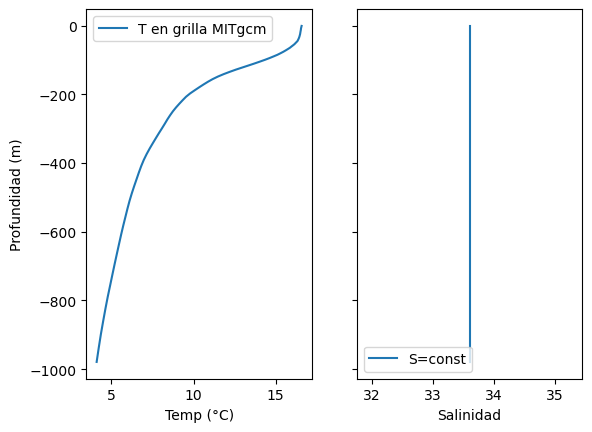

In [14]:
# Plot eveything
# (Opcional) Graficar para comparar
import matplotlib.pyplot as plt
fig, (ax, ax2) = plt.subplots(1,2, sharey=True)
# ax.plot(T_SVB, -RC_SVB, label='T original')
ax.plot(T, -RC, label='T en grilla MITgcm')
ax.set_xlabel('Temp (°C)')
ax.set_ylabel('Profundidad (m)')
ax.legend()

# ax2.plot(S_SVB, -RC_SVB, label='S original') # omitido, ya no se usa
ax2.plot(S, -RC, label='S=const')
ax2.set_xlabel('Salinidad')
ax2.legend()
plt.show()

In [15]:
for Tii, ii in zip(np.round(T, decimals=1), range(len(RC))):
    print(f'{Tii},', end=" ")
    if ii!=0 and ii%8 == 0:
        print('')

16.6, 16.6, 16.6, 16.6, 16.6, 16.6, 16.5, 16.5, 16.5, 
16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 16.5, 
16.5, 16.5, 16.5, 16.4, 16.4, 16.4, 16.4, 16.4, 
16.3, 16.3, 16.2, 16.1, 16.1, 16.0, 15.9, 15.7, 
15.6, 15.5, 15.3, 15.1, 14.9, 14.6, 14.4, 14.0, 
13.7, 13.4, 13.0, 12.6, 12.2, 11.8, 11.5, 11.2, 
10.9, 10.6, 10.3, 10.1, 9.8, 9.5, 9.3, 9.1, 
8.9, 8.8, 8.6, 8.4, 8.3, 8.1, 7.9, 7.7, 
7.5, 7.3, 7.1, 7.0, 6.8, 6.7, 6.5, 6.4, 
6.2, 6.1, 6.0, 5.9, 5.7, 5.6, 5.5, 5.3, 
5.2, 5.1, 4.9, 4.8, 4.6, 4.5, 4.4, 4.2, 
4.1, 

In [16]:
for Sii, ii in zip(np.round(S, decimals=1), range(len(RC))):
    print(f'{Sii},', end=" ")
    if ii!=0 and ii%8 == 0:
        print('')

33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 
33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 
33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 
33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 
33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 
33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 
33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 
33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 
33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 
33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 
33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 33.6, 
33.6, 

In [17]:
# make 3D arrays of size nx x ny x nz:
nx = 272
ny = 320
nz = np.shape(RC)[0]

T_array = np.expand_dims(np.expand_dims(T, axis=1), axis=1)
T_array = T_array * np.ones((nz,ny,nx))

S_array = np.expand_dims(np.expand_dims(S, axis=1), axis=1)
S_array = S_array * np.ones((nz,ny,nx))

In [18]:
dt = np.dtype('>f8')  # float 64 big endian

# Save binary file
filename = "feb_temp_%dzlev_%dx%d.bin" %(nz,nx,ny)
fileobj = open(filename,mode='wb')
T_array.astype(dt).tofile(fileobj,"")
fileobj.close()

filename = "feb_salt_%dzlev_%dx%d.bin" %(nz,nx,ny)
fileobj = open(filename,mode='wb')
S_array.astype(dt).tofile(fileobj,"")
fileobj.close()

In [19]:
# Save open boundary binary files feb (constant in time)
dt = np.dtype('>f8')  # float 64 big endian

# Western boundary
Ss_feb = np.squeeze(S_array[:,0,:])
filename = "Ss_feb_%dx%d.bin" %(nz,nx)
fileobj = open(filename,mode='wb')
Ss_feb.astype(dt).tofile(fileobj,"")
fileobj.close()

St_feb = np.squeeze(T_array[:,0,:])
filename = "St_feb_%dx%d.bin" %(nz,nx)
fileobj = open(filename,mode='wb')
St_feb.astype(dt).tofile(fileobj,"")
fileobj.close()